This notebook graphs individual pearson correlations for EGFR proteomics vs  EGFR phospho sites for the different cancer types. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


In [3]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [4]:

def plot_lin_regression(df1,x_axis, y_axis, title = "Title", ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis]]
    #df1_subset.columns = df1_subset.columns.droplevel(1)
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    corr, pval = scipy.stats.pearsonr(x1,y1)
        
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (30,22)
    graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, fit_reg=False)
    sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
    graph.set(title = title)
   
    
    if ra_stats:
     
       
        pval = myTrunc(pval,25)
        corr = myTrunc(corr,3)
        #"Slope of regression: %s\nR-squared: %s\nPvalue: %s" %
        plt.text(-4,4, "Correlation: %s\nPvalue: %s"%(corr,pval))
        
    if save_file_name != "file_name":
        
        #plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png')
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
        
    
    

In [5]:
prot_hnscc = hnscc.get_proteomics()
prot_gbm = brain.get_proteomics()
prot_en = en.get_proteomics()
prot_colon = colon.get_proteomics()
prot_brca = brca.get_proteomics()
prot_luad = luad.get_proteomics()
prot_ovar = Ovar.get_proteomics()
prot_ccrcc = ccrcc.get_proteomics()


# EGFR autophos

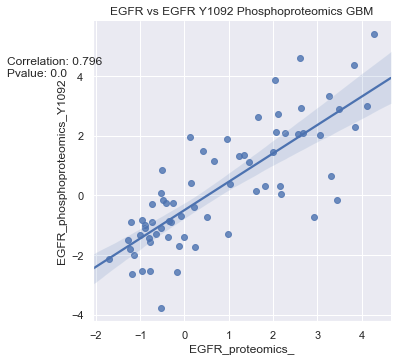

In [53]:
df1 = brca.join_omics_to_omics(df1_name="proteomics",df2_name = "phosphoproteomics",genes1=["EGFR"],genes2= "PECAM1")
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
#df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1.filter(like='PECAM1_phosphoproteomics_Y', axis=1)
#plot_lin_regression(df1,"EGFR_proteomics_","EGFR_phosphoproteomics_Y1092",title = "EGFR vs EGFR Y1092 Phosphoproteomics GBM", ra_stats = True, show_plot = True)

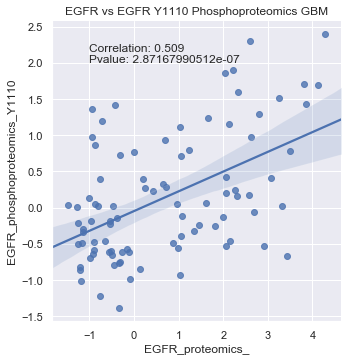

In [40]:
plot_lin_regression(df1,"EGFR_proteomics_","EGFR_phosphoproteomics_Y1110",title = "EGFR vs EGFR Y1110 Phosphoproteomics GBM", ra_stats = True, show_plot = True)

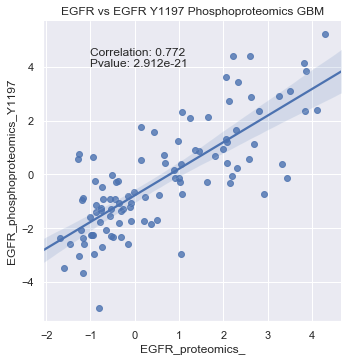

In [43]:
plot_lin_regression(df1,"EGFR_proteomics_","EGFR_phosphoproteomics_Y1197",title = "EGFR vs EGFR Y1197 Phosphoproteomics GBM", ra_stats = True, show_plot = True)

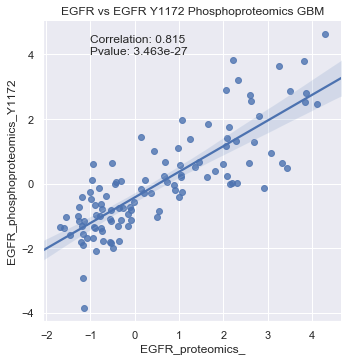

In [46]:
plot_lin_regression(df1,"EGFR_proteomics_","EGFR_phosphoproteomics_Y1172",title = "EGFR vs EGFR Y1172 Phosphoproteomics GBM", ra_stats = True, show_plot = True)

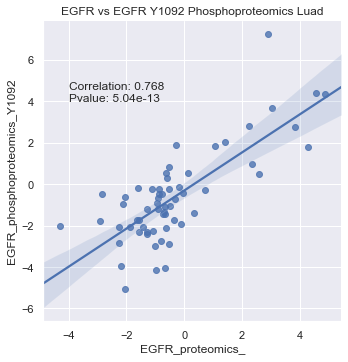

In [54]:
df1 = luad.join_omics_to_omics(df1_name="proteomics",df2_name = "phosphoproteomics",genes1="EGFR",genes2= "EGFR")
df1.columns = df1.columns.droplevel(2)
df1.columns = df1.columns.droplevel(2)
df1.columns =df1.columns.map('_'.join)
#df1 = df1.loc[df1['Sample_Status'] == "Tumor"]
df1.filter(like='EGFR_phosphoproteomics_Y', axis=1)
plot_lin_regression(df1,"EGFR_proteomics_","EGFR_phosphoproteomics_Y1092",title = "EGFR vs EGFR Y1092 Phosphoproteomics Luad", ra_stats = True, show_plot = True)

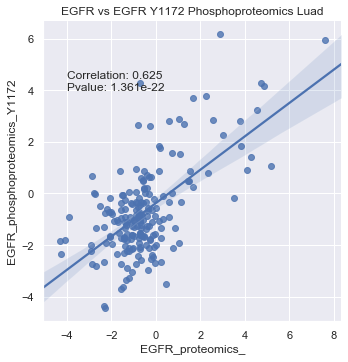

In [57]:
plot_lin_regression(df1,"EGFR_proteomics_","EGFR_phosphoproteomics_Y1172",title = "EGFR vs EGFR Y1172 Phosphoproteomics Luad", ra_stats = True, show_plot = True)

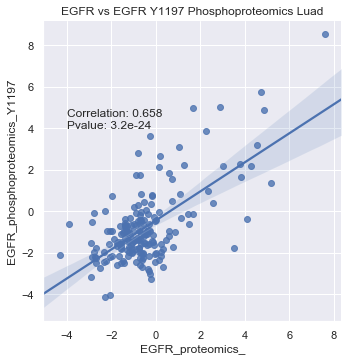

In [58]:
plot_lin_regression(df1,"EGFR_proteomics_","EGFR_phosphoproteomics_Y1197",title = "EGFR vs EGFR Y1197 Phosphoproteomics Luad", ra_stats = True, show_plot = True)